<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/weighted_above_50_dma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Bank Nifty Stocks
bank_nifty_stocks = [
    'SBIN.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS',
    'RBLBANK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'PNB.NS'
]
weights = {
    'SBIN.NS': 4, 'HDFCBANK.NS': 6, 'ICICIBANK.NS': 4, 'KOTAKBANK.NS': 2, 'AXISBANK.NS': 1,
    'INDUSINDBK.NS': 1, 'RBLBANK.NS': 1, 'FEDERALBNK.NS': 1, 'IDFCFIRSTB.NS': 1, 'BANDHANBNK.NS': 1,
    'BANKBARODA.NS':2, 'PNB.NS': 2
}

def calculate_weighted_percentage_above_moving_average(stock_list, start_date, weights):
    data = yf.download(stock_list, start=start_date)
    data = data['Adj Close']
    
    # Calculate the moving average using ewm with min_periods set to 50
    ma = data.ewm(span=50, min_periods=50).mean()

    above_ma = data > ma
    
    # Calculate the weighted sum of stocks above their 50 DMA
    weighted_above_ma = above_ma.mul(weights)
    weighted_sum = weighted_above_ma.sum(axis=1)

    # Calculate the total weight
    total_weight = sum(weights.values())

    # Calculate the weighted percentage of stocks above their 50 DMA for each day
    percentage = (weighted_sum / total_weight) * 100
    
    return percentage


weighted_percentage_above_dma = calculate_weighted_percentage_above_moving_average(bank_nifty_stocks, '2022-01-01', weights)

# Download the Bank Nifty index data
bank_nifty = yf.download('^NSEBANK', start='2022-01-01')

# Reindex Bank Nifty index data to match percentage_above_dma
aligned_bank_nifty_close = bank_nifty['Adj Close'].reindex(weighted_percentage_above_dma.index)




[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


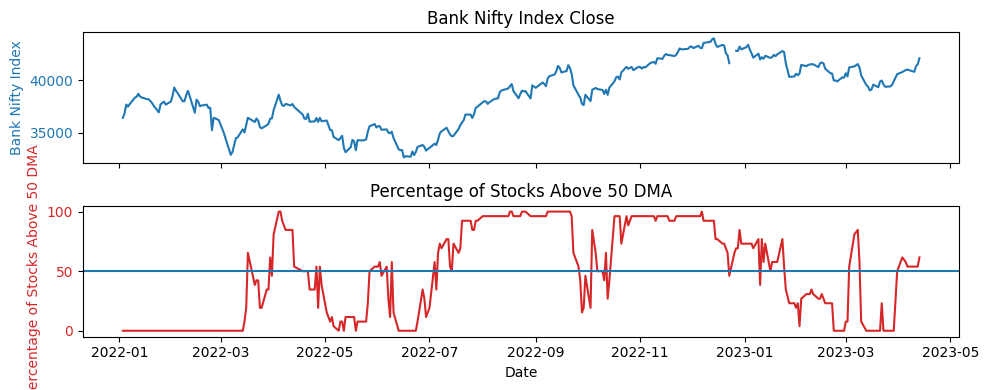

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,4), sharex=True)

# Plot the Bank Nifty index close
ax1.set_ylabel('Bank Nifty Index', color='tab:blue')
ax1.plot(aligned_bank_nifty_close.index, aligned_bank_nifty_close, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Bank Nifty Index Close')

# Plot the percentage of stocks above their 50 DMA
ax2.set_xlabel('Date')
ax2.set_ylabel('Percentage of Stocks Above 50 DMA', color='tab:red')
ax2.plot(weighted_percentage_above_dma.index, weighted_percentage_above_dma, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('Percentage of Stocks Above 50 DMA')
ax2.axhline(y=50)
fig.tight_layout()
plt.show()
